In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
!pip install gdown
!gdown --id 1xIYCrCOo3cPIgslEzI11_cQ_2QFROTHv

Downloading...
From: https://drive.google.com/uc?id=1xIYCrCOo3cPIgslEzI11_cQ_2QFROTHv
To: /content/data.csv
20.4MB [00:00, 55.8MB/s]


In [ ]:
data = pd.read_csv('/content/data.csv',header=None)

In [ ]:
D0 = data.copy();D1 = data.copy();D2 = data.copy();D3 = data.copy();D4 = data.copy();D5 =data.copy();D6 = data.copy();D7 = data.copy();D8 = data.copy();D9 = data.copy()

In [ ]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

In [ ]:

for i in range(10):
  for j in range(5000):
    if datasets[i].at[j,400] == i:
      datasets[i].at[j,400] = 1
    else:
      datasets[i].at[j,400] = 0

In [ ]:

#TrainTest_datadict['key'][0] ==> X && TrainTest_datadict['key'][1] ==> y
TrainTest_datadict = {}  
 #399 --> X 400 --> y 
for i in range(10):
  X = datasets[i].iloc[:,:400]
  X = X.T
  y = datasets[i].iloc[:,-1]
  y = np.array([y])
  TrainTest_datadict['D'+str(i)] = [X,y]

In [ ]:
itterations = 10000000   #random big value 
alpha = 0.160 
m = 5000
cost_values = []
trained_parameters = []

for trainsets in range(10):
  X = TrainTest_datadict['D'+str(trainsets)][0] 
  y = TrainTest_datadict['D'+str(trainsets)][1]
  weights = np.random.randn(1,400)
  bias = 0 
  costfunc_values = []
  k = 0
  print('Training for dataset '+str(trainsets))
  for i in range(1,itterations+1):
    #logistic function
    z = np.dot(weights,X) + bias 
    hypothesis = 1/(1 + np.exp(-z)) 

    #cost function
    j = 1/m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
    costfunc_values.append(j)
    k+=1

    #gradient decent
    dw =  1/m * np.dot(hypothesis-y,X.T)
    db =  1/m * np.sum(hypothesis-y)
    weights = weights - alpha*dw
    bias = bias - alpha*db

    #stop training
    if i%2000 == 0:
      print('running @ ',j)
    if i%2 == 0:
      if abs(j-costfunc_values[-2])<0.000001:
        if abs(j-costfunc_values[-3])<0.000001:
          break 
  cost_values.append(costfunc_values)  
  trained_parameters.append([weights,bias])      
  print('itteration number:',k)

Training for dataset 0
running @  0.03958790066436333
running @  0.029013949091746885
running @  0.02433483198540634
running @  0.021419987331459
running @  0.019372856155935286
running @  0.01784369781916413
running @  0.01665223746292708
itteration number: 14562
Training for dataset 1
running @  0.04193858870254664
running @  0.035196561869090946
running @  0.031611389567814216
running @  0.029195615305183463
running @  0.02739819694177086
running @  0.0259776927322691
running @  0.0248063014563308
itteration number: 14926
Training for dataset 2
running @  0.10593943197271492
running @  0.08444745247517742
running @  0.07715976098331523
running @  0.0731121845805873
running @  0.07030743662673566
running @  0.06815322044812991
running @  0.06640624242865058
running @  0.06494290830920009
running @  0.0636903786642591
running @  0.06260104827484965
itteration number: 20312
Training for dataset 3
running @  0.09597490086876202
running @  0.08299112701595752
running @  0.077046595834876

In [ ]:
for datasetnum in range(10):
  X = TrainTest_datadict['D'+str(datasetnum)][0]
  y = TrainTest_datadict['D'+str(datasetnum)][1]
  weights = trained_parameters[datasetnum][0]
  bias = trained_parameters[datasetnum][1]
  correct_predictions = 0 
  for i in range(5000):
    z = np.dot(weights,X.T.iloc[i,:])+bias
    hypothesis = 1/(1 + np.exp(-z))
    if np.logical_and(hypothesis >= 0.5,y.T[i,0] == 1):
        correct_predictions+=1
    if np.logical_and(hypothesis < 0.5,y.T[i,0] == 0):
        correct_predictions+=1    
  #print(correct_predictions)      
  acc = (correct_predictions/5000)*100
  print('accuracy for dataset '+str(datasetnum)," = ",acc)

accuracy for dataset 0  =  99.58
accuracy for dataset 1  =  99.33999999999999
accuracy for dataset 2  =  98.08
accuracy for dataset 3  =  98.1
accuracy for dataset 4  =  98.61999999999999
accuracy for dataset 5  =  98.02
accuracy for dataset 6  =  99.11999999999999
accuracy for dataset 7  =  98.66
accuracy for dataset 8  =  96.98
accuracy for dataset 9  =  97.3


In [ ]:
inputs = data.iloc[:,:400]
inputs = inputs.T
outputs = data.iloc[:,-1] 
outputs = np.array(outputs)
accuratepredicts = 0                
for i in range(5000):
  probabilities = []
  for j in range(10):
    weights = trained_parameters[j][0]
    bias = trained_parameters[j][1]
    z = np.dot(weights,inputs.iloc[:,i].T)+bias
    hypothesis = 1/(1 + np.exp(-z)) 
    probabilities.append(hypothesis)
  predict = probabilities.index(max(probabilities)) 
  if outputs.T[i] == predict:
    accuratepredicts+=1
print(accuratepredicts)

4698


In [ ]:
(accuratepredicts/5000)*100

93.96

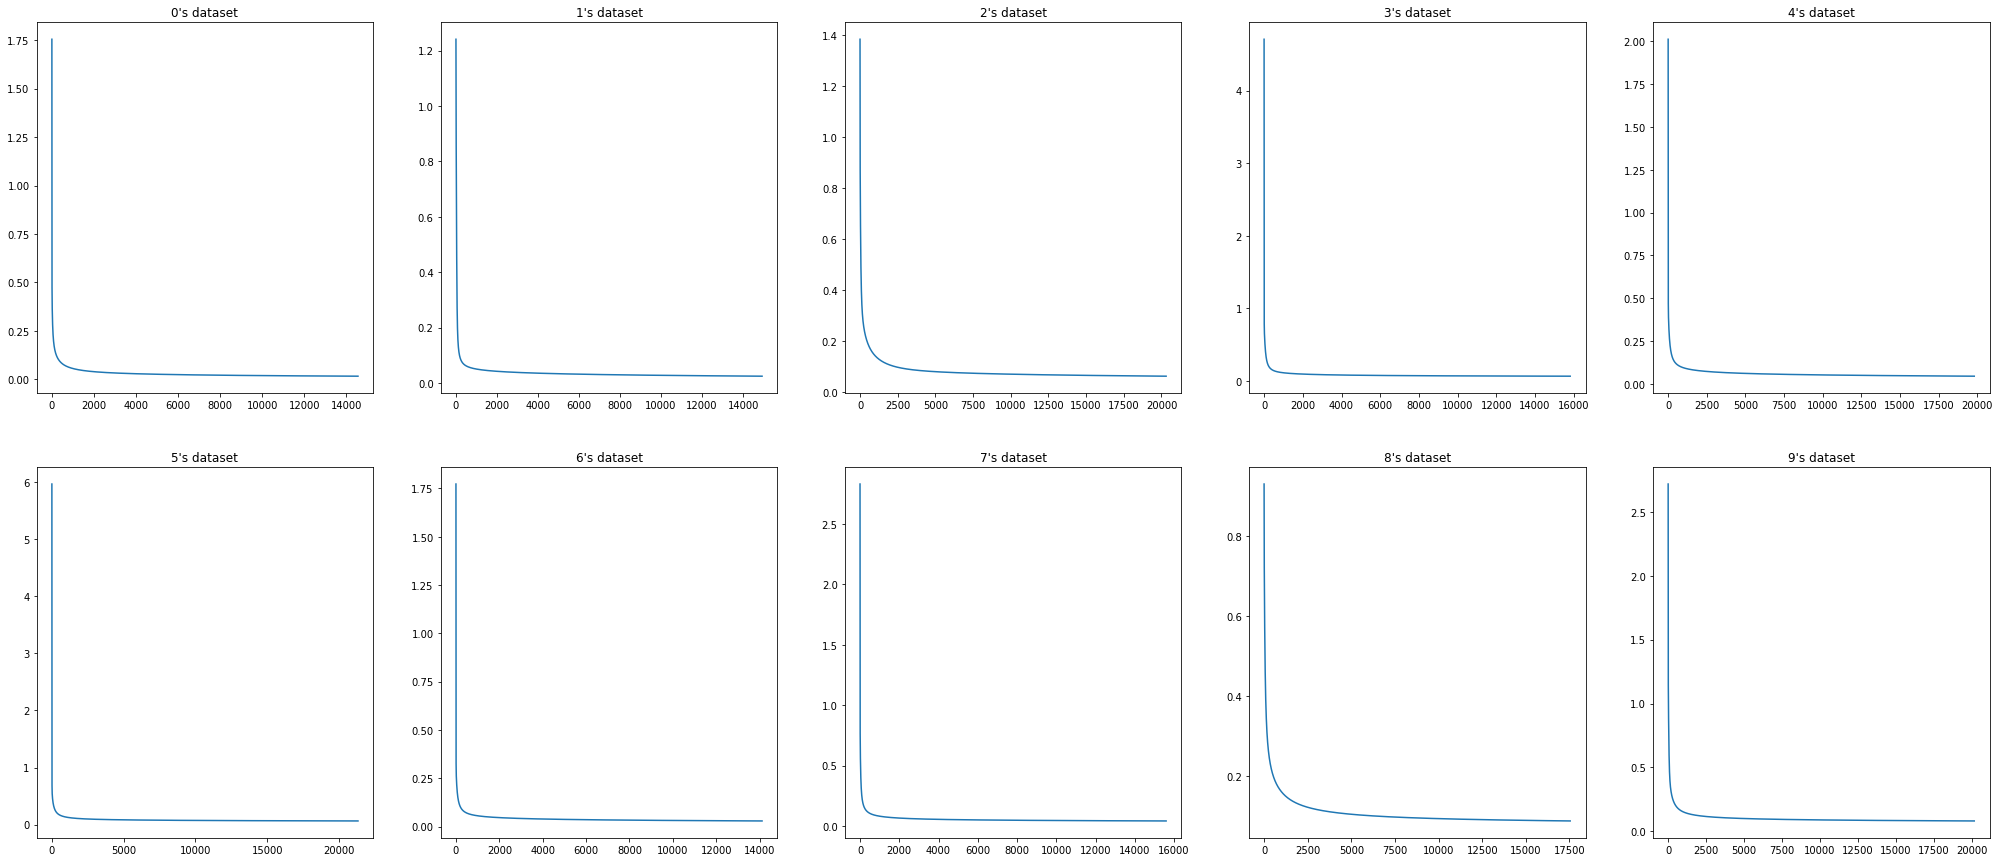

In [ ]:

fig,a =  plt.subplots(2,5,figsize=(35,15))
a[0][0].plot(cost_values[0])
a[0][0].set_title("0's dataset")
a[0][1].plot(cost_values[1])
a[0][1].set_title("1's dataset")
a[0][2].plot(cost_values[2])
a[0][2].set_title("2's dataset")
a[0][3].plot(cost_values[3])
a[0][3].set_title("3's dataset")
a[0][4].plot(cost_values[4])
a[0][4].set_title("4's dataset")
a[1][0].plot(cost_values[5])
a[1][0].set_title("5's dataset")
a[1][1].plot(cost_values[6])
a[1][1].set_title("6's dataset")
a[1][2].plot(cost_values[7])
a[1][2].set_title("7's dataset")
a[1][3].plot(cost_values[8])
a[1][3].set_title("8's dataset")
a[1][4].plot(cost_values[9])
a[1][4].set_title("9's dataset")
plt.show()